# INICIO DE ANALISIS AIRE MADRID 2018

In [1]:
# Librerias Generales
import pandas as pd
import seaborn as sns


In [2]:
# Librerias ploteo

import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
# Carga de CSV

aire2019 = pd.read_csv('datos201901.csv', sep = ';')
aire2018 = pd.read_csv('datos201812.csv', sep = ';')
aire2018_1 = pd.read_csv('datos201812_1.csv', sep = ';')

toxicos =pd.read_csv('toxicos.csv', sep=";",encoding = "ISO-8859-1", header = None)


### Tabla de toxicos y definciones

In [4]:
toxicos.head()

,0,1,2,3,4,5,6,7,8,9
0,1,Dióxido,de,Azufre,SO2,µg/m3,38,Fluorescencia,Ultravioleta,NaN
1,6,Monóxido,de,Carbono,CO,mg/m3,48,Absorción,infrarroja,NaN
2,7,Monóxido,de,Nitrógeno,NO,µg/m3,8,Quimioluminiscencia,NaN,NaN
3,8,Dióxido,de,Nitrógeno,NO2,µg/m3,8,Id.,NaN,NaN
4,9,Partículas,< 2.5,µm,PM2.5,µg/m3,47,Microbalanza,NaN,NaN


In [5]:
# Rellenamos posibles NaN
toxicos = toxicos.fillna("")

In [165]:
# toxicos= toxicos.drop(['NOMBRE_TOXICO'], axis = 1)

In [6]:
# Concatenamos Columnas

toxicos['NOMBRE_TOXICO'] = toxicos[1] +' '+ toxicos[2]+' '+ toxicos[3]
toxicos['TECNICA_MEDIDA'] =  toxicos[7]+' '+ toxicos[8]+' '+ toxicos[9]


In [7]:
# Renombramos columnas

toxicos.columns = ['ID_TOXICO', 'N1','N2','N3', 'ABREVIATURA', 'UNIDAD', 'ID_TECNICA','N7','N8','N9','NOMBRE_TOXICO','TECNICA_MEDIDA' ]
toxicos = toxicos[['ID_TOXICO','NOMBRE_TOXICO','ABREVIATURA', 'UNIDAD', 'ID_TECNICA','TECNICA_MEDIDA']]            


In [8]:
aire2018['TOTAL'] = aire2018.D01 + aire2018.D02 + aire2018.D03 + aire2018.D04 + aire2018.D05 + aire2018.D06 + aire2018.D07 + aire2018.D08 + aire2018.D09 + aire2018.D10+ aire2018.D11 + aire2018.D12 + aire2018.D13 + aire2018.D14 + aire2018.D15 + aire2018.D16 + aire2018.D17 + aire2018.D18 + aire2018.D19 + aire2018.D20 + aire2018.D21 + aire2018.D22 + aire2018.D23 + aire2018.D24 + aire2018.D25 + aire2018.D26 + aire2018.D27 + aire2018.D28 + aire2018.D29 + aire2018.D30 + aire2018.D31

In [9]:
aire2018.TOTAL.head()

0    95.0
1    84.0
2    55.0
3    64.0
4    67.0
Name: TOTAL, dtype: float64

### Mergeamos Aire DF y Toxicos DF

In [10]:
aire = pd.merge(aire2018, toxicos, how='outer', on=None,
               left_on='MAGNITUD',right_on = 'ID_TOXICO', indicator = True)

In [11]:
aire.

0    both
1    both
2    both
3    both
4    both
Name: _merge, dtype: category
Categories (3, object): [left_only, right_only, both]

In [12]:
aire[aire['_merge']=='right_only']

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D31,V31,TOTAL,ID_TOXICO,NOMBRE_TOXICO,ABREVIATURA,UNIDAD,ID_TECNICA,TECNICA_MEDIDA,_merge
1806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37,Metaxileno,MXY,µg/m3,59,Id.,right_only
1807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,38,Paraxileno,PXY,µg/m3,59,Id.,right_only
1808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,39,Ortoxileno,OXY,µg/m3,59,Id.,right_only


In [13]:
aire

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D31,V31,TOTAL,ID_TOXICO,NOMBRE_TOXICO,ABREVIATURA,UNIDAD,ID_TECNICA,TECNICA_MEDIDA,_merge
0,28.0,79.0,4.0,1.0,28079004_1_38,2018.0,1.0,1.00,V,1.00,...,6.00,V,95.00,1,Dióxido de Azufre,SO2,µg/m3,38,Fluorescencia Ultravioleta,both
1,28.0,79.0,4.0,1.0,28079004_1_38,2018.0,2.0,5.00,V,3.00,...,0.00,N,84.00,1,Dióxido de Azufre,SO2,µg/m3,38,Fluorescencia Ultravioleta,both
2,28.0,79.0,4.0,1.0,28079004_1_38,2018.0,3.0,1.00,V,2.00,...,2.00,V,55.00,1,Dióxido de Azufre,SO2,µg/m3,38,Fluorescencia Ultravioleta,both
3,28.0,79.0,4.0,1.0,28079004_1_38,2018.0,4.0,2.00,V,3.00,...,0.00,N,64.00,1,Dióxido de Azufre,SO2,µg/m3,38,Fluorescencia Ultravioleta,both
4,28.0,79.0,4.0,1.0,28079004_1_38,2018.0,5.0,2.00,V,2.00,...,2.00,V,67.00,1,Dióxido de Azufre,SO2,µg/m3,38,Fluorescencia Ultravioleta,both
5,28.0,79.0,4.0,1.0,28079004_1_38,2018.0,6.0,3.00,V,2.00,...,0.00,N,69.00,1,Dióxido de Azufre,SO2,µg/m3,38,Fluorescencia Ultravioleta,both
6,28.0,79.0,4.0,1.0,28079004_1_38,2018.0,7.0,2.00,V,2.00,...,7.00,V,174.00,1,Dióxido de Azufre,SO2,µg/m3,38,Fluorescencia Ultravioleta,both
7,28.0,79.0,4.0,1.0,28079004_1_38,2018.0,8.0,9.00,V,8.00,...,9.00,V,259.00,1,Dióxido de Azufre,SO2,µg/m3,38,Fluorescencia Ultravioleta,both
8,28.0,79.0,4.0,1.0,28079004_1_38,2018.0,9.0,10.00,V,9.00,...,0.00,N,274.00,1,Dióxido de Azufre,SO2,µg/m3,38,Fluorescencia Ultravioleta,both
9,28.0,79.0,4.0,1.0,28079004_1_38,2018.0,10.0,10.00,V,11.00,...,10.00,V,998.00,1,Dióxido de Azufre,SO2,µg/m3,38,Fluorescencia Ultravioleta,both


In [14]:
print(len(aire))
aire = aire.dropna()
print(len(aire))

1809
1806


In [15]:
aire.describe()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,ANO,MES,D01,D02,D03,D04,...,D25,D26,D27,D28,D29,D30,D31,TOTAL,ID_TOXICO,ID_TECNICA
count,1806.0,1806.0,1806.000000,1806.000000,1806.0,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,...,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000
mean,28.0,79.0,34.651163,13.159468,2018.0,6.500000,24.953156,23.037774,25.342359,25.894452,...,28.914751,29.721711,29.740255,28.475044,24.145559,23.791190,18.942481,793.365327,13.159468,22.740864
std,0.0,0.0,17.959731,10.524897,0.0,3.457338,32.467819,26.509996,29.414667,41.258465,...,37.169653,40.050881,39.623131,40.089131,37.240642,33.781192,40.426750,906.658101,10.524897,20.965011
min,28.0,79.0,4.000000,1.000000,2018.0,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.050000,0.000000,0.000000,-0.060000,0.000000,0.000000,0.000000,1.220000,1.000000,2.000000
25%,28.0,79.0,18.000000,7.000000,2018.0,3.000000,1.572500,1.800000,2.000000,1.662500,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,73.000000,7.000000,8.000000
50%,28.0,79.0,38.000000,10.000000,2018.0,6.500000,12.500000,12.000000,14.500000,11.000000,...,16.000000,16.000000,16.000000,14.000000,9.500000,10.000000,0.500000,504.000000,10.000000,8.000000
75%,28.0,79.0,54.000000,14.000000,2018.0,10.000000,37.000000,37.000000,40.000000,35.000000,...,45.000000,44.000000,45.000000,41.000000,35.000000,35.000000,19.000000,1201.000000,14.000000,47.000000
max,28.0,79.0,60.000000,44.000000,2018.0,12.000000,236.000000,174.000000,207.000000,461.000000,...,298.000000,378.000000,350.000000,352.000000,610.000000,297.000000,358.000000,6315.000000,44.000000,59.000000


In [ ]:
# PENDIENTE. 
# LLEGAR A LA COLUMNA "TOTAL" DE UN MODO MAS OPTIMIZADO

In [16]:
aire.groupby(['ESTACION','NOMBRE_TOXICO']).TOTAL.sum()

ESTACION  NOMBRE_TOXICO                      
4.0       Dióxido de Azufre                       2980.00
          Dióxido de Nitrógeno                   15672.00
          Monóxido de Carbono                      148.40
          Monóxido de Nitrógeno                   9944.00
          Óxidos de Nitrógeno                    30917.00
8.0       Benceno                                  256.90
          Dióxido de Azufre                       1785.00
          Dióxido de Nitrógeno                   20003.00
          Etilbenceno                              145.50
          Hidrocarburos no metánicos (hexano)       26.22
          Hidrocarburos totales (hexano)           564.20
          Metano                                   538.50
          Monóxido de Carbono                      137.00
          Monóxido de Nitrógeno                   9510.00
          Ozono                                  17276.00
          Partículas < 10 µm                      7516.00
          Partículas < 2.5

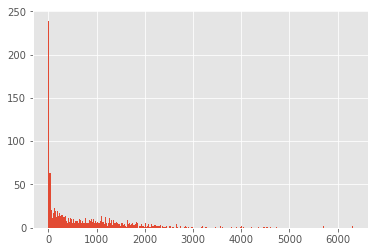

In [215]:
plt.hist(aire.TOTAL,500)
plt.show()